# Exploratory Data Analysis

The goal of this notebook is to conduct exploratory data analysis (EDA) to understand the key factors influencing compatibility in online dating. By analyzing user demographics, lifestyle choices, and other attributes, we aim to optimize the matchmaking system and ensure relevant, high-quality recommendations.

This project leverages the OKCupid Profiles Dataset (sourced from [Kaggle](https://www.kaggle.com/datasets/andrewmvd/okcupid-profiles)) to explore, analyze, and clean data for a content-based recommendation system. The ultimate objective is to match users based on meaningful similarities rather than collaborative filtering methods, making personalized matchmaking more effective.

In [ ]:
!pip install autoviz

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

from google.colab import drive
drive.mount('/content/drive')

%matplotlib inline

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 583.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.5 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.4
    Uninstalling xgboost-2.1.4:
      Successfully uninstalled xgboost-2.1.4
Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data-science-dating-project/df_cleaned.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58822 entries, 0 to 58821
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  58822 non-null  int64  
 1   status               58822 non-null  object 
 2   sex                  58822 non-null  object 
 3   orientation          58822 non-null  object 
 4   diet                 58822 non-null  object 
 5   drinks               58822 non-null  object 
 6   drugs                58822 non-null  object 
 7   education            58822 non-null  object 
 8   ethnicity            58822 non-null  object 
 9   height               58822 non-null  float64
 10  job                  58822 non-null  object 
 11  location             58822 non-null  object 
 12  offspring            58822 non-null  object 
 13  pets                 58822 non-null  object 
 14  religion             58822 non-null  object 
 15  smokes               58822 non-null 

In [ ]:
# for visualization, we don't need speaks_original or combined_essay_cols.
drop_cols = ['speaks_original', 'combined_essay_cols']
viz_df = df.drop(columns=drop_cols)

# double checking to make sure speaks_original and combined_essay_cols were dropped.
viz_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58822 entries, 0 to 58821
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             58822 non-null  int64  
 1   status          58822 non-null  object 
 2   sex             58822 non-null  object 
 3   orientation     58822 non-null  object 
 4   diet            58822 non-null  object 
 5   drinks          58822 non-null  object 
 6   drugs           58822 non-null  object 
 7   education       58822 non-null  object 
 8   ethnicity       58822 non-null  object 
 9   height          58822 non-null  float64
 10  job             58822 non-null  object 
 11  location        58822 non-null  object 
 12  offspring       58822 non-null  object 
 13  pets            58822 non-null  object 
 14  religion        58822 non-null  object 
 15  smokes          58822 non-null  object 
 16  speaks          58822 non-null  object 
 17  cleaned_essays  57169 non-null 

In [ ]:
df.head()

,age,status,sex,orientation,diet,drinks,drugs,education,ethnicity,height,job,location,offspring,pets,religion,smokes,speaks,speaks_original,combined_essay_cols,cleaned_essays
0,22,single,m,straight,anything,socially,never,college/university_studying,mixed,75.0,transportation,"south san francisco, california","no Kids, might want",likes pets,agnosticism,occasionally,monolingual,english,about me: i would love to think that i was so...,would love think kind intellectual either dumb...
1,35,single,m,straight,other,often,sometimes,other,white,70.0,hospitality / travel,"oakland, california","no Kids, might want",likes pets,agnosticism,no,multilingual,"english, spanish, french",i am a chef: this is what that means. 1. i am ...,chef mean 1 workaholic 2 love cook regardless ...
2,38,single,m,straight,anything,socially,unknown,masters_graduated,unknown,68.0,rather not say,"san francisco, california",unknown,has pets,other,no,multilingual,"english, french","i'm not ashamed of much, but writing public te...",im ashamed much writing public text online dat...
3,23,single,m,straight,vegetarian,socially,unknown,college/university_studying,white,71.0,student,"berkeley, california","no kids, doesn't want",likes cats,other,no,multilingual,"english, german",i work in a library and go to school. . . read...,work library go school reading thing written o...
4,29,single,m,straight,unknown,socially,never,college/university_graduated,mixed,66.0,artistic / musical / writer,"san francisco, california",unknown,likes pets,other,no,monolingual,english,hey how's it going? currently vague on the pro...,hey hows going currently vague profile know co...


The dataframe is relatively clean and contain no nulls except for the `speaks_original`, `combined_essay_cols`, and `cleaned_essays`. This is intentional as I am experimenting with the columns. `speaks` is a binary version of `speaks_original` where users are categorized as monolingual versus multilingual. It was created because I wanted to add in the language ability into the matchmaking algorithm without the excessive complexity of having multiple languages. I left `speaks_original` in for deeper exploration later.

## Demographics & User Characteristics

### Gender Distribution
Examines the proportion of female and male profiles to identify gender imbalances (if any) in matchmaking.

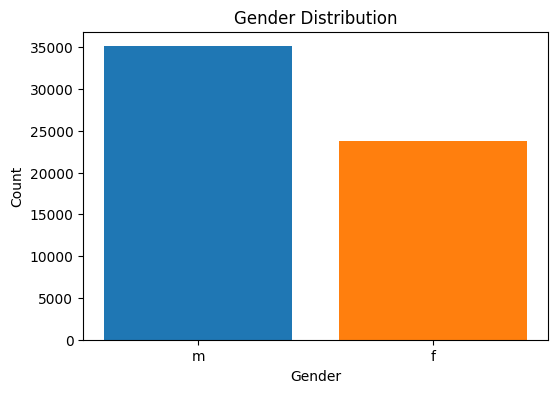

In [ ]:
# gender
plt.figure(figsize=(6,4))
sex_counts = viz_df['sex'].value_counts()
plt.bar(sex_counts.index, sex_counts.values, color=['#1f77b4', '#ff7f0e'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

In [ ]:
viz_df['sex'].value_counts()

,count
sex,
m,35091
f,23731


In [ ]:
print(round((viz_df['sex'].value_counts()/len(viz_df))*100),2)

sex
m    60.0
f    40.0
Name: count, dtype: float64 2


Based on this bar chart, we can see that our dataset contains more male profiles than female profiles. Males make up 60% of the users and female make up 40% of the users. This may cause an issue for users seeking female matches as they may have fewer options impacting matchmaking; users seeking male matches will find more competition. This distribution might skew match availability, making it essential to balance recommendation or consider implementing fairness-weighting matching strategies to improve user experience.

### Relationship Status
Analyzes users' relationship status to understand their dating intent.

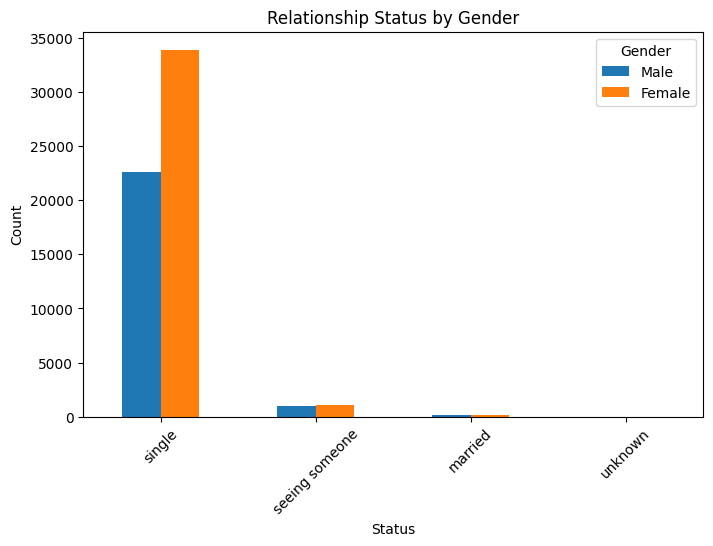

In [ ]:
# Profile counts grouped by status and gender
status_counts = viz_df.groupby(['status', 'sex']).size().unstack()

# Plot as grouped bar chart
status_counts = status_counts.loc[status_counts.sum(axis=1).sort_values(ascending=False).index]
status_counts.plot(kind='bar', figsize=(8,5), color=['#1f77b4', '#ff7f0e'])

# Labels and title
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Relationship Status by Gender')
plt.legend(title="Gender", labels=['Male', 'Female'])
plt.xticks(rotation=45)
plt.show()


In [ ]:
print(round((viz_df['status'].value_counts()/len(viz_df))*100),2)

status
single            96.0
seeing someone     3.0
married            1.0
unknown            0.0
Name: count, dtype: float64 2


The majority of users identify as single with a select few in relationships or married. The select few in relationships could be a mistake when registering, or a different relationship dynamics.

### Sexual Orientation
Looks at the distribution of sexual orientation to identify trends in user preferences.

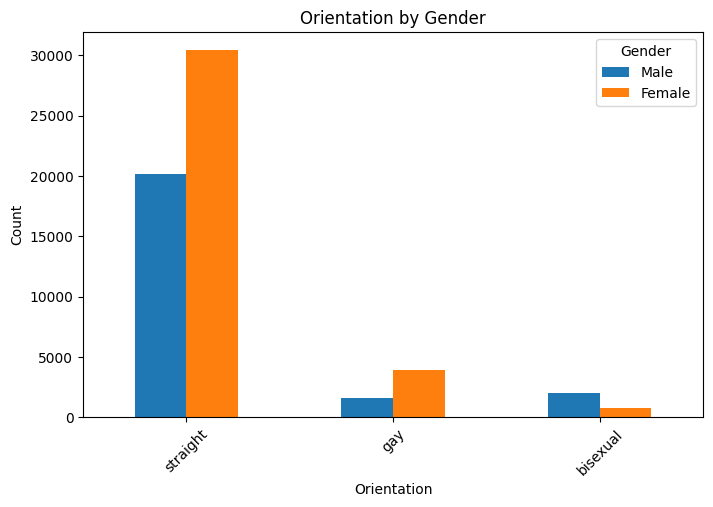

In [ ]:
# orientation
orientation_counts = viz_df.groupby(['orientation', 'sex']).size().unstack()

# Plot as grouped bar chart
orientation_counts = orientation_counts.loc[orientation_counts.sum(axis=1).sort_values(ascending=False).index]
orientation_counts.plot(kind='bar', figsize=(8,5), color=['#1f77b4', '#ff7f0e'])

# Labels and title
plt.xlabel('Orientation')
plt.ylabel('Count')
plt.title('Orientation by Gender')
plt.legend(title="Gender", labels=['Male', 'Female'])
plt.xticks(rotation=45)
plt.show()


In [ ]:
viz_df['orientation'].value_counts()

,count
orientation,
straight,50613
gay,5495
bisexual,2714


In [ ]:
print(round((viz_df['orientation'].value_counts()/len(viz_df))*100),2)

orientation
straight    86.0
gay          9.0
bisexual     5.0
Name: count, dtype: float64 2


Straight users make up the majority of this dataset (86%). This can have an impact on match making as LGBTQ+ users may have fewer matches in this dataset.

## Lifestyle & Personal Traits

### Drinking/ Smoking/ Drug Use Habit
Evaluates drinking, smoking, and drug usage frequency among users and its potential impact on compatibility.

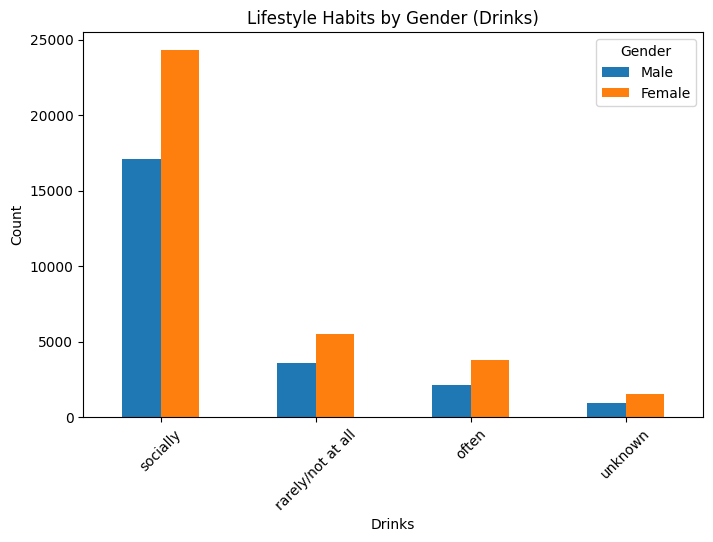

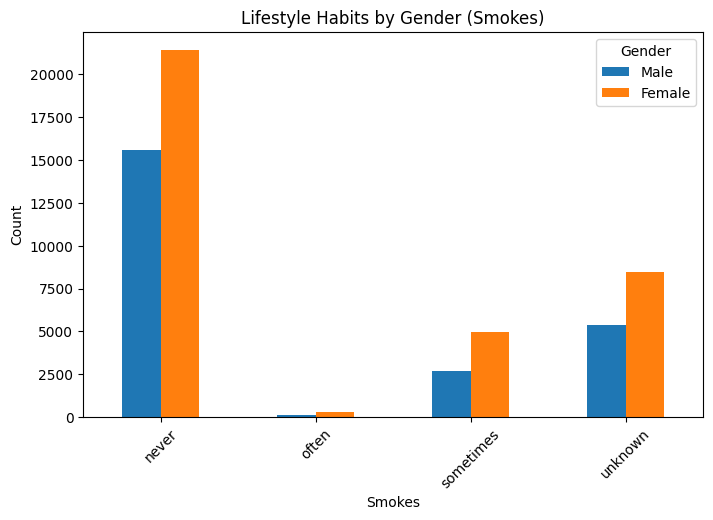

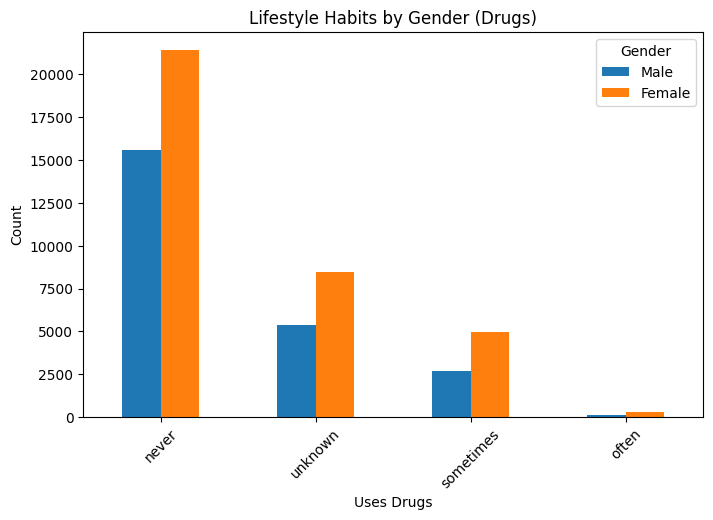

In [ ]:
# Lifestyle Habits by Gender (Drinks)
drinks_counts = viz_df.groupby(['drinks', 'sex']).size().unstack()

drinks_counts = drinks_counts.loc[drinks_counts.sum(axis=1).sort_values(ascending=False).index]
drinks_counts.plot(kind='bar', figsize=(8,5), color=['#1f77b4', '#ff7f0e'])

plt.xlabel('Drinks')
plt.ylabel('Count')
plt.title('Lifestyle Habits by Gender (Drinks)')
plt.legend(title="Gender", labels=['Male', 'Female'])
plt.xticks(rotation=45)
plt.show()

# Lifestyle Habits by Gender (Smokes)
smokes_counts = viz_df.groupby(['drugs', 'sex']).size().unstack()

drugs_counts = smokes_counts.loc[smokes_counts.sum(axis=1).sort_values(ascending=False).index]
smokes_counts.plot(kind='bar', figsize=(8,5), color=['#1f77b4', '#ff7f0e'])

plt.xlabel('Smokes')
plt.ylabel('Count')
plt.title('Lifestyle Habits by Gender (Smokes)')
plt.legend(title="Gender", labels=['Male', 'Female'])
plt.xticks(rotation=45)
plt.show()


# Lifestyle Habits by Gender (Drugs)
drugs_counts = viz_df.groupby(['drugs', 'sex']).size().unstack()

drugs_counts = drugs_counts.loc[drugs_counts.sum(axis=1).sort_values(ascending=False).index]
drugs_counts.plot(kind='bar', figsize=(8,5), color=['#1f77b4', '#ff7f0e'])

plt.xlabel('Uses Drugs')
plt.ylabel('Count')
plt.title('Lifestyle Habits by Gender (Drugs)')
plt.legend(title="Gender", labels=['Male', 'Female'])
plt.xticks(rotation=45)
plt.show()

In [ ]:
print(round((viz_df['drinks'].value_counts()/len(viz_df))*100),2)
print("\n")
print(round((viz_df['smokes'].value_counts()/len(viz_df))*100),2)
print("\n")
print(round((viz_df['drugs'].value_counts()/len(viz_df))*100),2)

drinks
socially             70.0
rarely/not at all    16.0
often                10.0
unknown               4.0
Name: count, dtype: float64 2


smokes
no                74.0
occasionally      11.0
unknown            8.0
regularly          4.0
trying to quit     3.0
Name: count, dtype: float64 2


drugs
never        63.0
unknown      23.0
sometimes    13.0
often         1.0
Name: count, dtype: float64 2


Here are the key takeaways from plotting lifestyle traits (drinks, smokes, (uses) drugs):
* The majority of users (70%) drink socially.
* Non-smokers are the dominant group.
* 63% of users report never using drugs.

Each of these could influence potential match capability.






### Height Distribution by Gender
Looks at the height differences across genders to examine portential dating preferences.

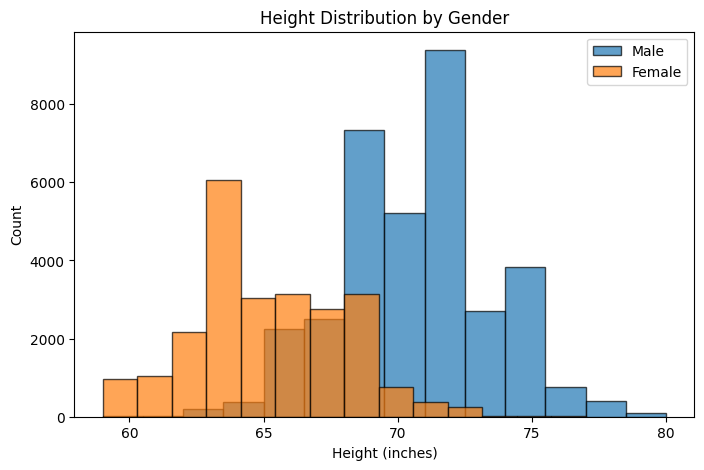

In [ ]:
male_height = viz_df['height'].loc[viz_df['sex'] == 'm']
female_height = viz_df['height'].loc[viz_df['sex'] == 'f']

plt.figure(figsize=(8,5))

plt.hist(male_height, label="Male", bins=14, alpha=.7, color='#1f77b4', edgecolor='black')


plt.hist(female_height, label="Female", bins=14, alpha=.7,color='#ff7f0e', edgecolor='black')
plt.legend()

plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.title('Height Distribution by Gender')
plt.show()

The height distribution chart shows that most women are under 65 inches or 5'4, while most men are over 70 inches or 5'8.

### Career & Education
Career and education level can influence compatibility to it is important to understand distributions,

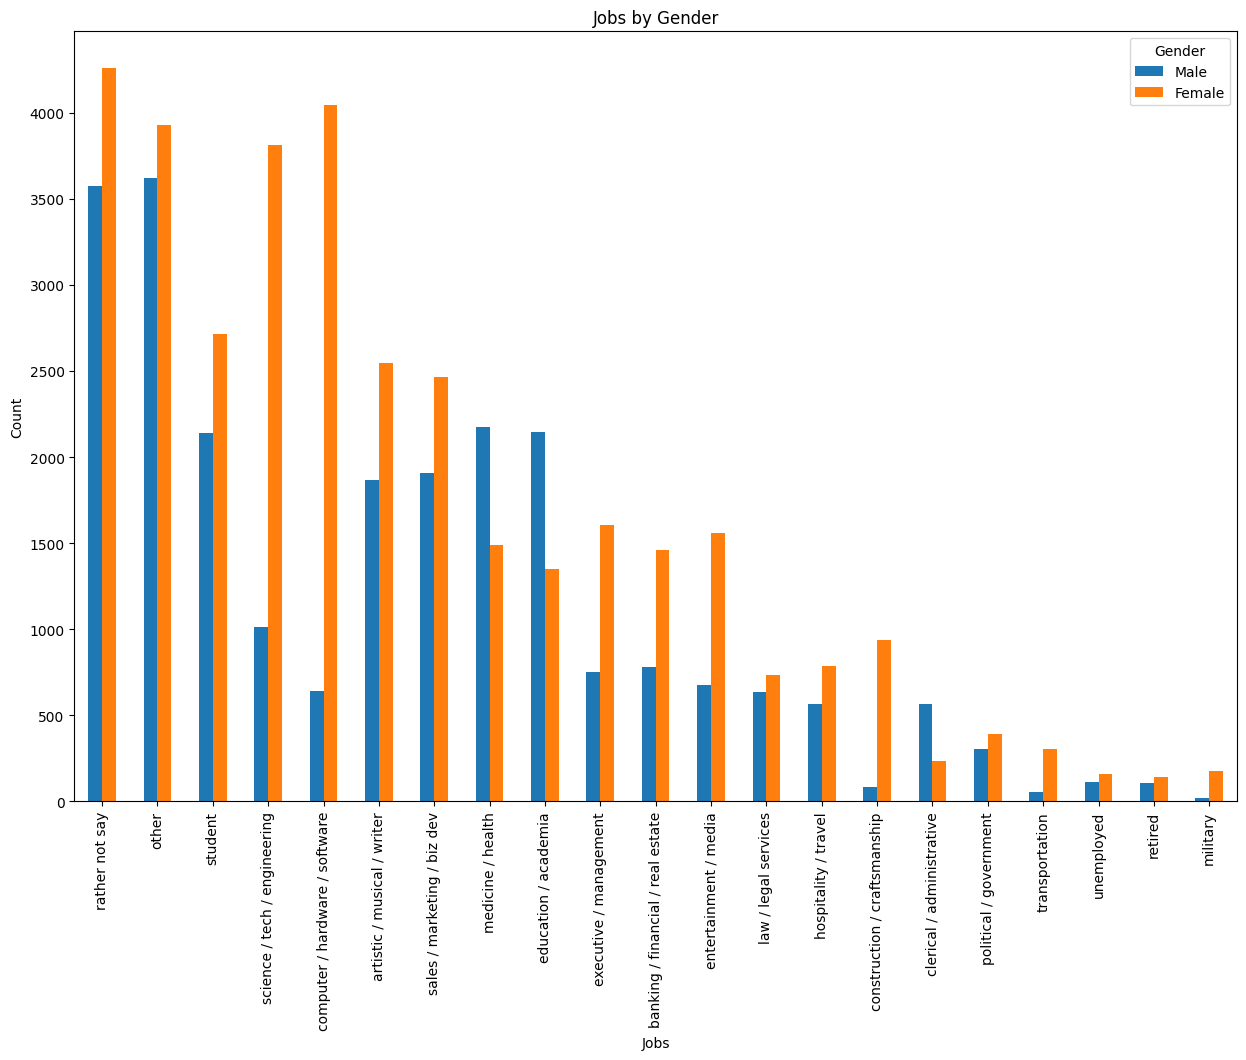

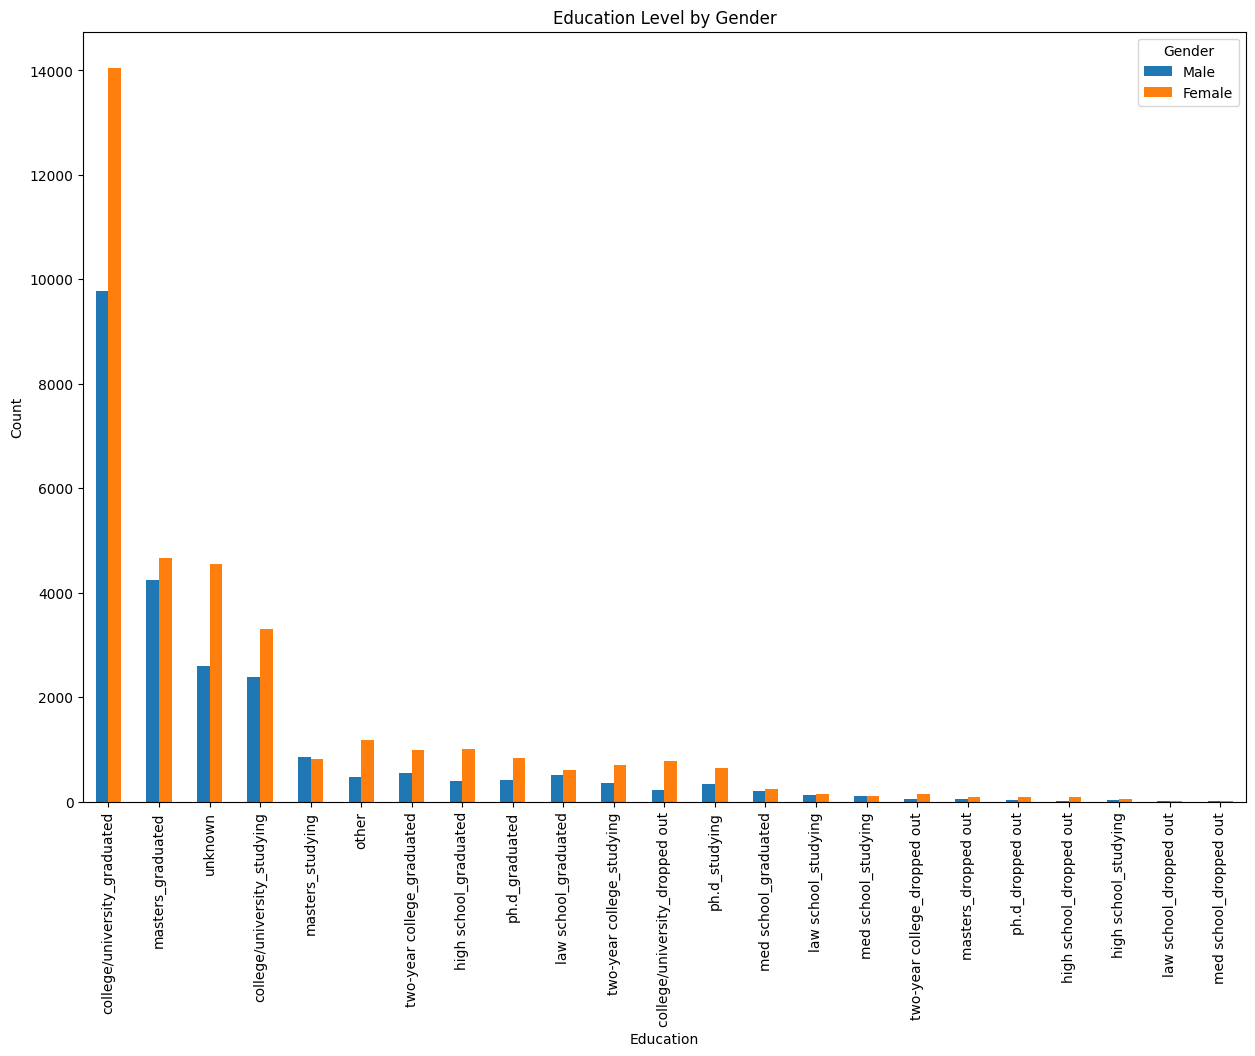

In [ ]:
# job
job_counts = viz_df.groupby(['job', 'sex']).size().unstack()

job_counts =job_counts.loc[job_counts.sum(axis=1).sort_values(ascending=False).index]
job_counts.plot(kind='bar', figsize=(15,10), color=['#1f77b4', '#ff7f0e'])

# Labels and title
plt.xlabel('Jobs')
plt.ylabel('Count')
plt.title('Jobs by Gender')
plt.legend(title="Gender", labels=['Male', 'Female'])
plt.xticks()
plt.show()



# education
education_counts = viz_df.groupby(['education', 'sex']).size().unstack()

education_counts = education_counts.loc[education_counts.sum(axis=1).sort_values(ascending=False).index]
education_counts.plot(kind='bar', figsize=(15,10), color=['#1f77b4', '#ff7f0e'])

# Labels and title
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education Level by Gender')
plt.legend(title="Gender", labels=['Male', 'Female'])
plt.xticks()
plt.show()

Women are more represented across most job categories, with construction being the only field where men dominate. Mst users have graduated college/university, and women also are more represented across most education categories. This trend could influence matchmaking preferences based on career aspirations or lifestyle compatibility.

## Correlation Analysis and Feature Selection

### Pearson Correlation for Numerical Columns
Examines correlation between numerical columns `age` and `height` for matchmaking purposes.

In [ ]:
df_numerical = viz_df[['age', 'height']]
df_numerical.corr()

,age,height
age,1.000000,-0.023744
height,-0.023744,1.000000


Text(0.5, 1.0, 'Numerical Correlation Heatmap')

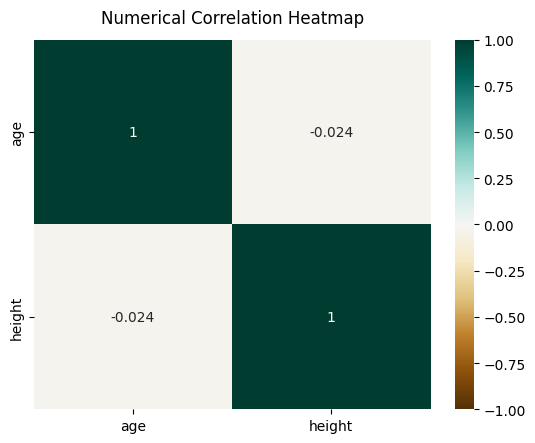

In [ ]:
heatmap = sns.heatmap(df_numerical.corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG')
heatmap.set_title('Numerical Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

After applying pearson correlation to our numeric columns we discover that age and height have a correlation of -0.023744, indicating that there exists no linear relationship between the two variables. We can conclude that height doesn't significantly change with age in our dataset, strengthening the notion that these attributes are largely independent when considering matchmaking factor.

### Converting 'Cleaned_Essay' column to something meaningful

As is, the `cleaned_essay` column would not generate meaningful insights when comparing it against the other columns for correlation as it is free-form text. To perhaps get meaning, I will get the length of each essay and based on its length, convert to categories 'short', 'medium', 'long' length essays. This allows us to look at whether a certain age group writes longer essays, or perhaps a certain gender.

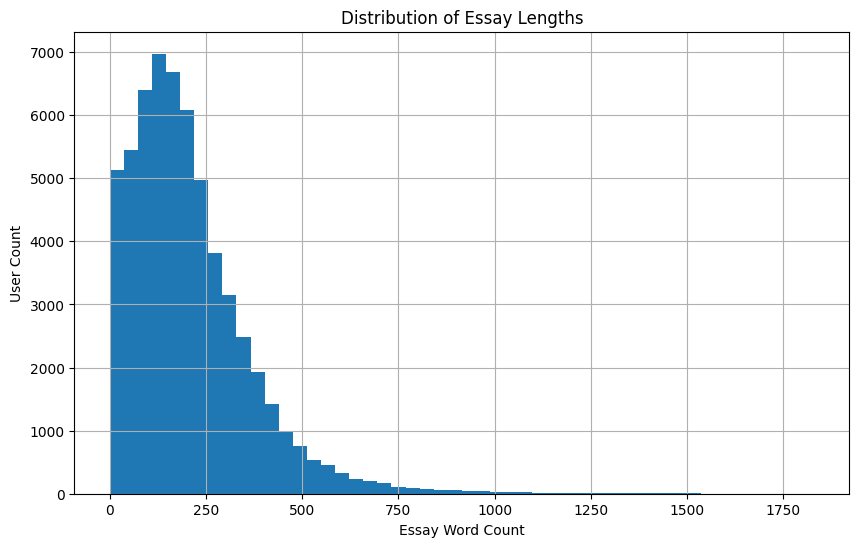

In [ ]:
# checking the "Essays" column for outliers

viz_df['essay_word_count'] = viz_df['cleaned_essays'].apply(lambda x: len(str(x).split()))
viz_df[viz_df['essay_word_count'] <= 2000]['essay_word_count'].hist(bins=50, figsize=(10,6))
# viz_df['essay_word_count'].hist(bins=50, figsize=(10, 6))
plt.xlabel('Essay Word Count')
plt.ylabel('User Count')
plt.title('Distribution of Essay Lengths')
plt.show()

The `Cleaned_Essay` column was calculated by combining all written responses across essay0 through essay9 — the open-ended profile prompts users answer on OkCupid. This measure reflects total self-expression and effort put into the profile, rather than length of a single response.

In [ ]:
viz_df['cleaned_essays'] = viz_df['cleaned_essays'].fillna("")

In [ ]:
# print(len(viz_df['cleaned_essays']))
# print(viz_df['cleaned_essays'].str.len())
# df['text'].str.split().apply(len)
#print(np.percentile(viz_df['cleaned_essays'].dropna().str.split().apply(len), [33, 66, 100]))

viz_df['word_count'] = viz_df['cleaned_essays'].dropna().str.split().apply(len)

def essay_count_categ(word_count):
  if word_count <= 122:
    return 'short'
  elif word_count <= 235:
    return 'medium'
  else:
    return 'long'

viz_df['essay_length'] = viz_df['word_count'].apply(essay_count_categ)

In [ ]:
viz_df.sample()

,age,status,sex,orientation,diet,drinks,drugs,education,ethnicity,height,...,location,offspring,pets,religion,smokes,speaks,cleaned_essays,essay_word_count,word_count,essay_length
12234,31,single,f,straight,unknown,socially,never,masters_graduated,unknown,63.0,...,"san francisco, california",unknown,likes dogs,other,no,multilingual,sf almost two year originally back east spent ...,137,137,medium


In [ ]:
viz_df['essay_length'].value_counts()

,count
essay_length,
long,19893
medium,19489
short,19440


I used the 33rd, 66th, and 100th percentile to categorize the essays into their respective categories.

In [ ]:
viz_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58822 entries, 0 to 58821
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               58822 non-null  int64  
 1   status            58822 non-null  object 
 2   sex               58822 non-null  object 
 3   orientation       58822 non-null  object 
 4   diet              58822 non-null  object 
 5   drinks            58822 non-null  object 
 6   drugs             58822 non-null  object 
 7   education         58822 non-null  object 
 8   ethnicity         58822 non-null  object 
 9   height            58822 non-null  float64
 10  job               58822 non-null  object 
 11  location          58822 non-null  object 
 12  offspring         58822 non-null  object 
 13  pets              58822 non-null  object 
 14  religion          58822 non-null  object 
 15  smokes            58822 non-null  object 
 16  speaks            58822 non-null  object

### Craner's V for Categorical Correlation

The purpose of Cramer's V here is to look at the association between our categorical variables and the `essay_length` column to explore verbosity as a behavioral trait.

In [ ]:
def cramers_V(col1, col2):
  # contingency table
  crosstab = np.array(pd.crosstab(col1, col2, rownames = None, colnames = None))
  stat = chi2_contingency(crosstab)[0]

  # calculating total observations
  obs = np.sum(crosstab)

  m = min(crosstab.shape)-1

  return np.sqrt(stat/(m * obs))

In [ ]:
results = []

for col in viz_df.select_dtypes(include='object').columns:
    if col != 'essay_length':
        try:
            v = cramers_V(viz_df[col], viz_df['essay_length'])
            results.append((col, round(v, 3)))
        except Exception as e:
            print(f"Skipped {col} due to error: {e}")

In [ ]:
df_cramers = pd.DataFrame(results, columns=['features', "Cramer's V"])
df_cramers.sort_values("Cramer's V", ascending=False, inplace=True)
df_cramers.reset_index(drop=True, inplace=True)

In [ ]:
df_cramers

,features,Cramer's V
0,cleaned_essays,1.000
1,pets,0.140
2,education,0.139
3,religion,0.136
4,job,0.116
5,ethnicity,0.106
6,speaks,0.102
7,location,0.101
8,smokes,0.076
9,drugs,0.067


<Axes: xlabel='features'>

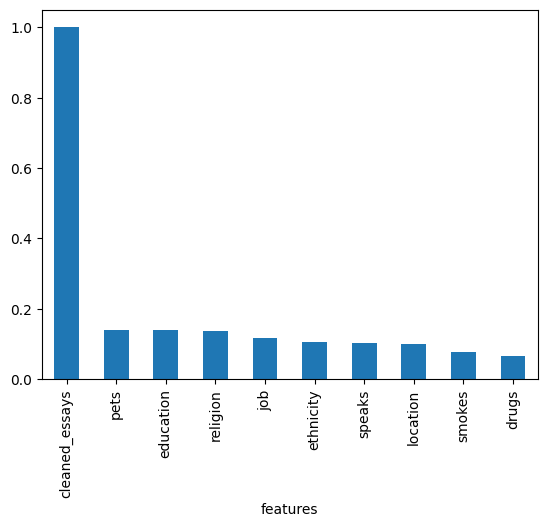

In [ ]:
df_cramers.head(10).plot(kind='bar', x='features', y="Cramer's V", legend=False)

Using Cramer's V we focus on the features that have a strong/moderate association to the column `essay_length`.


`cleaned_essays` having the strongest association to `essay_length` makes sense as it is used to create `essay_length`.

`pets` and `education` are next with moderate associations of 0.140 and 0.139 respectively.

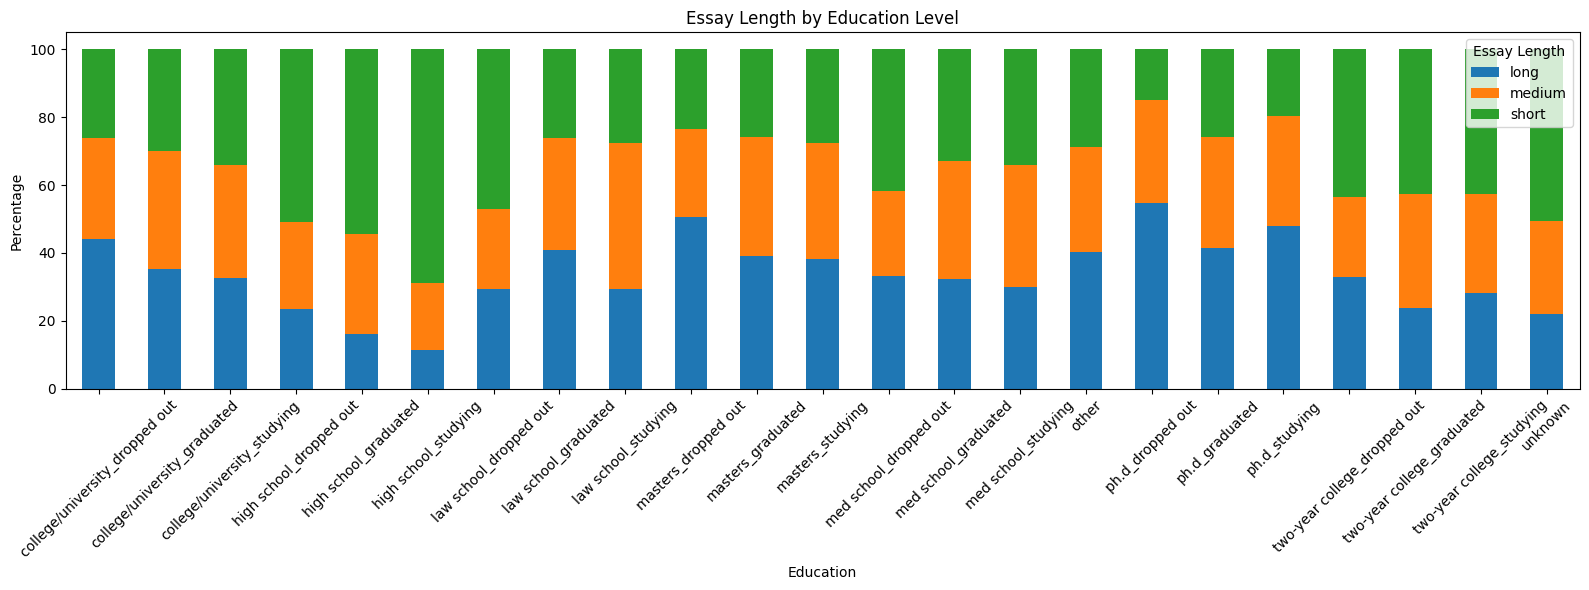

In [ ]:
education_dist = viz_df.groupby('education')['essay_length'].value_counts(normalize=True).unstack().fillna(0) * 100

education_dist.plot(kind='bar', stacked=True, figsize=(16, 6))
plt.title('Essay Length by Education Level')
plt.ylabel('Percentage')
plt.xlabel('Education')
plt.legend(title='Essay Length')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
print(education_dist.round(2).sort_values(by='long', ascending=False))

essay_length                     long  medium  short
education                                           
ph.d_dropped out                54.76   30.16  15.08
masters_dropped out             50.71   25.71  23.57
ph.d_studying                   47.90   32.41  19.69
college/university_dropped out  44.01   29.91  26.08
ph.d_graduated                  41.46   32.59  25.95
law school_graduated            40.95   32.94  26.10
other                           40.26   31.07  28.67
masters_graduated               39.19   34.89  25.92
masters_studying                38.11   34.29  27.60
college/university_graduated    35.17   34.83  30.00
med school_dropped out          33.33   25.00  41.67
two-year college_dropped out    32.98   23.56  43.46
college/university_studying     32.55   33.36  34.10
med school_graduated            32.28   34.76  32.96
med school_studying             29.86   36.02  34.12
law school_studying             29.48   42.91  27.61
law school_dropped out          29.41   23.53 

Based on the Essay Length by Education graph, users with higher education levels tend to provide more complete and expressive responses across multiple dating prompts.

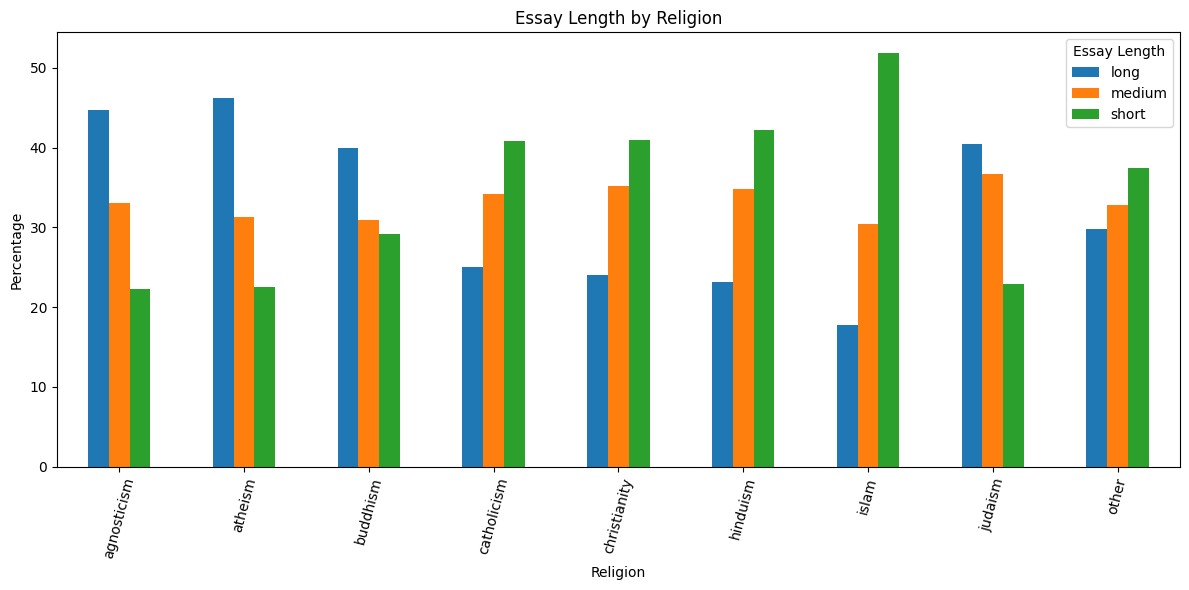

In [ ]:
religion_dist = viz_df.groupby('religion')['essay_length'].value_counts(normalize=True).unstack().fillna(0) * 100

religion_dist.plot(kind='bar', figsize=(12, 6))
plt.title('Essay Length by Religion')
plt.ylabel('Percentage')
plt.xlabel('Religion')
plt.legend(title='Essay Length')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

In [ ]:
print(religion_dist.round(2).sort_values(by='long', ascending=False))

essay_length   long  medium  short
religion                          
atheism       46.27   31.23  22.50
agnosticism   44.76   33.01  22.23
judaism       40.39   36.69  22.92
buddhism      39.91   30.87  29.22
other         29.76   32.79  37.44
catholicism   25.03   34.17  40.80
christianity  23.97   35.14  40.88
hinduism      23.09   34.75  42.15
islam         17.78   30.37  51.85


Atheist users were more likely to write longer answers to the dating prompts compared to users of other religious affiliations. This could suggest a greater emphasis on self-expression or a stronger desire to convey personal values and identity outside of religious frameworks.


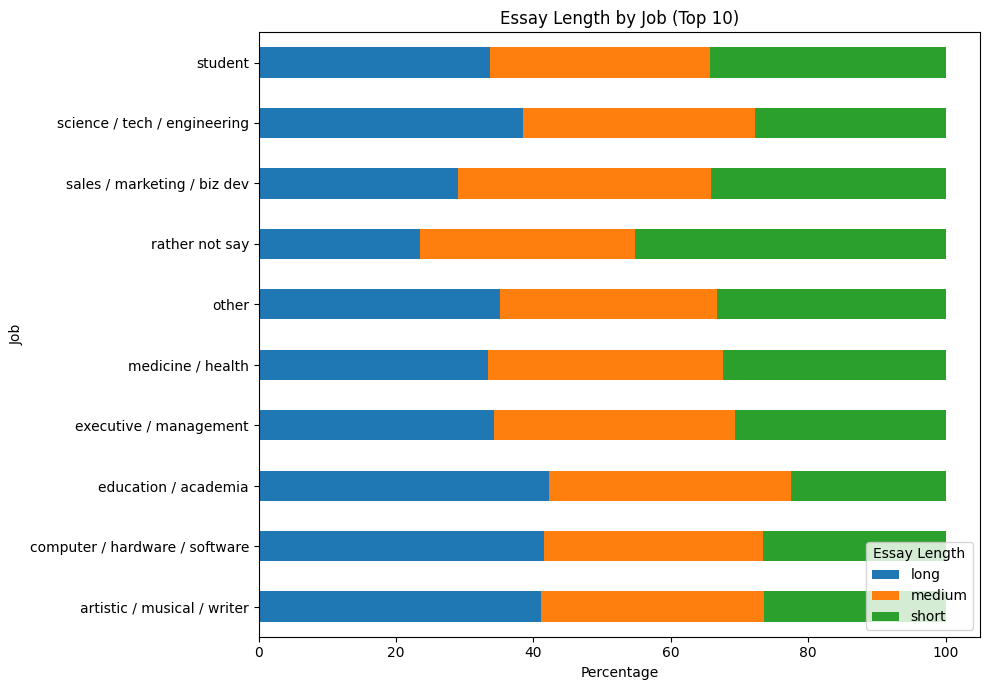

In [ ]:
top_jobs = viz_df['job'].value_counts().nlargest(10).index
top_job_data = viz_df[viz_df['job'].isin(top_jobs)]

job_dist = top_job_data.groupby('job')['essay_length'].value_counts(normalize=True).unstack().fillna(0) * 100

job_dist.plot(kind='barh', stacked=True, figsize=(10, 7))
plt.title('Essay Length by Job (Top 10)')
plt.xlabel('Percentage')
plt.ylabel('Job')
plt.legend(title='Essay Length', loc='lower right')
plt.tight_layout()
plt.show()

In [ ]:
print(job_dist.round(2).sort_values(by='long', ascending=False))

essay_length                     long  medium  short
job                                                 
education / academia            42.24   35.20  22.56
computer / hardware / software  41.52   31.93  26.55
artistic / musical / writer     41.09   32.52  26.39
science / tech / engineering    38.51   33.74  27.75
other                           35.15   31.56  33.28
executive / management          34.32   35.09  30.59
student                         33.62   32.12  34.26
medicine / health               33.42   34.19  32.39
sales / marketing / biz dev     29.06   36.77  34.16
rather not say                  23.44   31.32  45.24


Among all professions, users working in education were the most expressive, with 42.24% writing long essays. This was followed by users in the tech industry (41.52%) and creative professionals such as artists, musicians, and writers (41.09%).

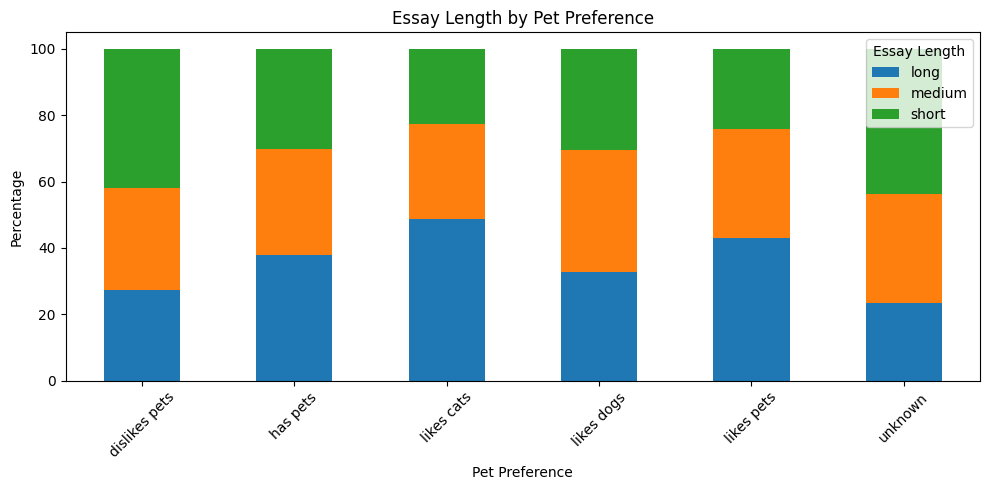

In [ ]:
pets_dist = viz_df.groupby('pets')['essay_length'].value_counts(normalize=True).unstack().fillna(0) * 100

pets_dist.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Essay Length by Pet Preference')
plt.ylabel('Percentage')
plt.xlabel('Pet Preference')
plt.legend(title='Essay Length')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
print(pets_dist.round(2).sort_values(by='long', ascending=False))

essay_length    long  medium  short
pets                               
likes cats     48.61   28.64  22.76
likes pets     42.91   32.93  24.16
has pets       37.92   31.98  30.10
likes dogs     32.64   36.78  30.58
dislikes pets  27.17   30.81  42.02
unknown        23.39   32.73  43.89


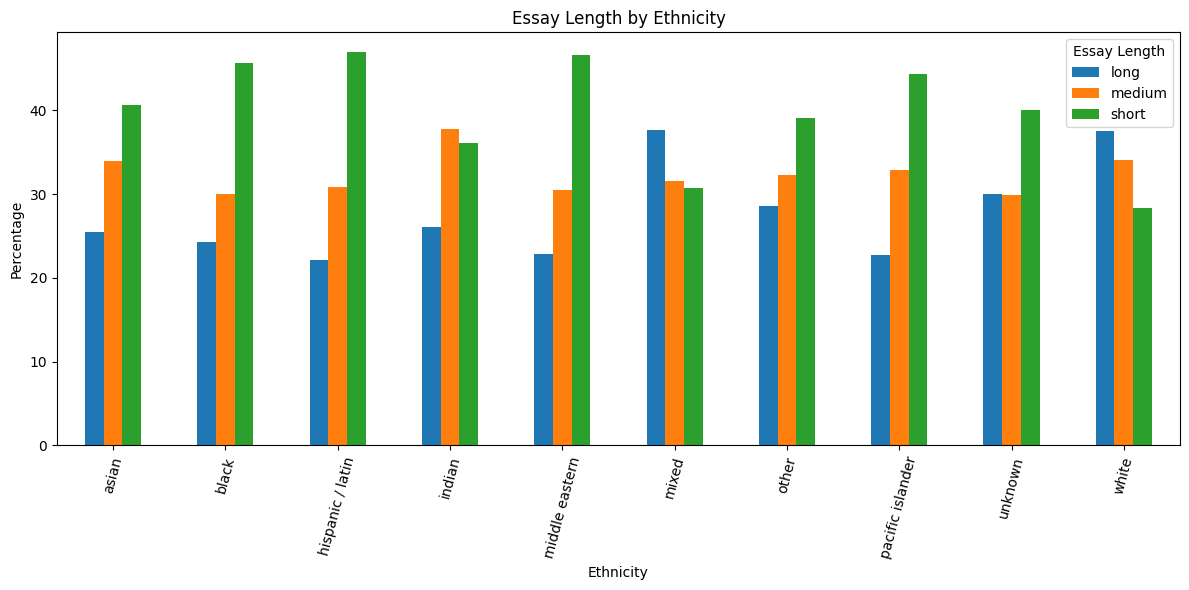

In [ ]:
ethnic_counts = viz_df['ethnicity'].value_counts()
common_ethnicities = ethnic_counts[ethnic_counts > 200].index
viz_df_ethnic = viz_df[viz_df['ethnicity'].isin(common_ethnicities)].copy()

ethnic_dist = viz_df_ethnic.groupby('ethnicity')['essay_length'].value_counts(normalize=True).unstack().fillna(0) * 100

ethnic_dist.plot(kind='bar', figsize=(12, 6))
plt.title('Essay Length by Ethnicity')
plt.ylabel('Percentage')
plt.xlabel('Ethnicity')
plt.legend(title='Essay Length')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

In [ ]:
print(ethnic_dist.round(2).sort_values(by='long', ascending=False))

essay_length       long  medium  short
ethnicity                             
mixed             37.70   31.56  30.75
white             37.56   34.14  28.30
unknown           29.97   29.93  40.10
other             28.58   32.29  39.13
indian            26.08   37.76  36.16
asian             25.44   33.91  40.65
black             24.27   30.04  45.69
middle eastern    22.84   30.56  46.60
pacific islander  22.76   32.93  44.31
hispanic / latin  22.19   30.84  46.98
